# Additional exploratory analysis for epithileal cell typing

This notebook performs addtional EDA on the data to refine the analysis.

## 0. Initializations

In [1]:
## 0. Initializations
# -- imports --
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

from signals_in_the_noise.preprocessing.gse161529 import GSE161529
from signals_in_the_noise.utilities.storage import get_resources_path
from signals_in_the_noise.utilities.visualization import get_figure_axes

In [2]:
# -- datasets --
gse = GSE161529()

2025-08-01 13:25:14,181 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909253_N-PM0092-Total.h5ad as AnnData object.
2025-08-01 13:25:14,252 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909254_N-PM0019-Total.h5ad as AnnData object.
2025-08-01 13:25:14,331 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909255_N-N280-Epi.h5ad as AnnData object.
2025-08-01 13:25:14,370 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909256_N-PM0095-Epi.h5ad as AnnData object.
2025-08-01 13:25:14,461 [INFO] signals_in_the_noise.utilities.tenx_genomics: Reading C:\Users\silly\GitHub\signals-in-the-noise\data\GSE161529_adata_cache\GSM4909257_N-PM0095-Total.h5ad 

## 1. Tuning parameters for "Noise" cell clustering

In [3]:
_, all_noise = gse.get_combined_epithilial_dataset()

2025-08-01 13:25:19,475 [INFO] signals_in_the_noise.preprocessing.gse161529: Loading combined datasets...


### 1.a. `n_neighbors`

In [4]:
# tuning_values = [3, 5, 9, 13, 18]
# _, axes = get_figure_axes(len(tuning_values), 2)
#
# for idx, value in enumerate(tuning_values):
#     gse.apply_tsne(all_noise, n_neighbors=value)
#     gse.visualize_tsne(
#         all_noise,
#         # color=['leiden', 'specimen_id'],
#         color=['leiden'],
#         plot_kwargs={
#             'title': f"n_neighbors: {value}",
#             'ax': axes[idx],
#             'show': False,
#         }
#     )
#
# plt.tight_layout()
# plt.show()

### 1.b. `n_pcs`

In [5]:
# tuning_values = [5, 10, 15, 20, 25, 30]
# _, axes = get_figure_axes(len(tuning_values), 2)
#
# for idx, value in enumerate(tuning_values):
#     gse.apply_tsne(all_noise, n_pcs=value)
#     gse.visualize_tsne(
#         all_noise,
#         # color=['leiden', 'specimen_id'],
#         color=['leiden'],
#         plot_kwargs={
#             'title': f"n_pcs: {value}",
#             'ax': axes[idx],
#             'show': False,
#         }
#     )
#
# plt.tight_layout()
# plt.show()

### 1.c. `resolution`

In [6]:
# tuning_values = [1.0, 0.9, 0.8, 0.5, 0.2]
# _, axes = get_figure_axes(len(tuning_values), 2)
#
# for idx, value in enumerate(tuning_values):
#     gse.apply_tsne(all_noise, resolution=value)
#     gse.visualize_tsne(
#         all_noise,
#         # color=['leiden', 'specimen_id'],
#         color=['leiden'],
#         plot_kwargs={
#             'title': f"resolution: {value}",
#             'ax': axes[idx],
#             'show': False,
#         }
#     )
#
# plt.tight_layout()
# plt.show()

### 1.d. `resolution` + others

C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
C:\Users\silly\GitHub\signals-in-the-noise\src\signals_in_the_noise\preprocessing\gse161529.py:506: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, **default_cluster_parameters)
C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
C:\Users\silly\GitHub\signals-in-the-noise\.venv\Lib\site-packages\scipy\sparse\_index.py:210: SparseEffici

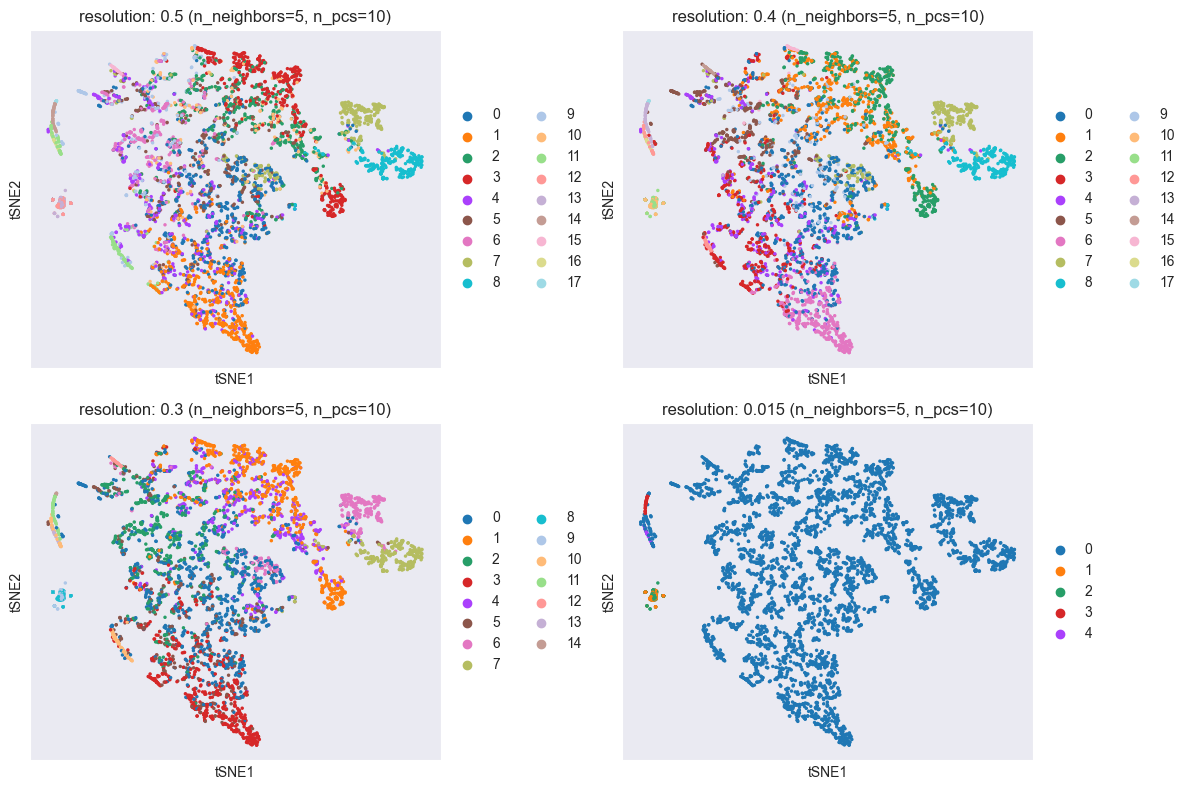

In [7]:
tuning_values = [0.5, 0.4, 0.3, 0.015]
_, axes = get_figure_axes(len(tuning_values), 2)

for idx, value in enumerate(tuning_values):
    gse.find_clusters(all_noise, neighbors_kwargs={'n_neighbors': 5, 'n_pcs': 10}, cluster_kwargs={'resolution': value})
    gse.visualize_tsne(
        all_noise,
        # color=['leiden', 'specimen_id'],
        color=['leiden'],
        plot_kwargs={
            'title': f"resolution: {value} (n_neighbors=5, n_pcs=10)",
            'ax': axes[idx],
            'show': False,
        }
    )

plt.tight_layout()
plt.show()

## 2. Check for pathway genes

Verify that the selected genes for the selected pathways exist in the datasest before proceeding to capturing the expression data for heatmap.

In [8]:
_, all_noise = gse.get_combined_epithilial_dataset(genes_to_check=['CDC25C', 'CDK1', 'PLK1', 'AURKA', 'WEE1'])

2025-08-01 13:25:28,475 [INFO] signals_in_the_noise.preprocessing.gse161529: Loading combined datasets...


In [9]:
_, all_noise = gse.get_combined_epithilial_dataset(genes_to_check=['CDK1', 'CCNA2', 'E2F1', 'E2F2'])

2025-08-01 13:25:28,936 [INFO] signals_in_the_noise.preprocessing.gse161529: Loading combined datasets...


In [10]:
_, all_noise = gse.get_combined_epithilial_dataset(genes_to_check=['BRCA1', 'BRCA2', 'RAD51', 'ATM', 'CHEK2', 'XRCC1'])

2025-08-01 13:25:29,386 [INFO] signals_in_the_noise.preprocessing.gse161529: Loading combined datasets...


In [11]:
_, all_noise = gse.get_combined_epithilial_dataset(genes_to_check=['ATF6', 'XBP1', 'CHOP', 'GRP78', 'PERK', 'DDIT3', 'HSPA5', 'EIF2AK3'])

2025-08-01 13:25:30,002 [INFO] signals_in_the_noise.preprocessing.gse161529: Loading combined datasets...
